In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Read the dataset into your environment
dataset = pd.read_csv('winequality-white.csv',sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Check for the presence of null values (If any!)
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
dataset['quality'] = pd.cut(dataset['quality'],bins=[0,5.9,6,np.inf],labels=['Bad','Average','Good'])

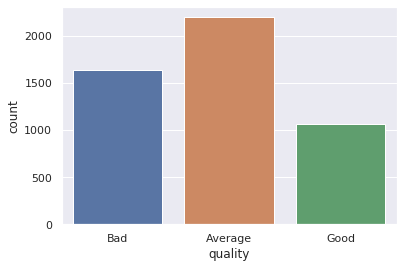

In [5]:
# Distribution of 
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="quality", data=dataset)
plt.show()

In [6]:
dataset.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3018,6.8,0.22,0.31,6.9,0.037,33.0,121.0,0.99176,3.02,0.39,11.90,Good
403,7.1,0.27,0.31,18.2,0.046,55.0,252.0,1.00000,3.07,0.56,8.70,Bad
3036,6.8,0.29,0.34,3.5,0.054,26.0,189.0,0.99489,3.42,0.58,10.40,Bad
4128,6.6,0.33,0.32,15.6,0.054,62.0,227.0,0.99734,3.25,0.56,10.40,Bad
3647,6.4,0.29,0.24,3.2,0.037,31.0,95.0,0.98942,2.90,0.66,12.60,Good
1288,7.2,0.32,0.33,1.4,0.029,29.0,109.0,0.99020,3.15,0.51,12.80,Good
1025,6.2,0.15,0.46,1.6,0.039,38.0,123.0,0.99300,3.38,0.51,9.70,Average
4684,6.0,0.24,0.34,1.0,0.036,52.0,184.0,0.99097,3.44,0.44,11.45,Average
3322,5.7,0.26,0.30,1.8,0.039,30.0,105.0,0.98995,3.48,0.52,12.50,Good
1286,6.6,0.16,0.29,1.8,0.050,40.0,147.0,0.99120,3.06,0.44,11.40,Good


### Use Min-Max Scaler to Normalize the Dataset
Each feature is transformed using the following formula:-
 $X_{scaled} = \frac{X_{i} - X_{min}} {(X_{max}-X_{min})}$


We do so because the space $C[0,1]$ has some nice properties. (Refer to lecture for more details!)

In [7]:
from sklearn import preprocessing
X = dataset.iloc[:,0:11].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X))
y = dataset['quality']

In [8]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


#### Categorical Encoding
- **Label Encoding**: Done when there is a specific order amongst variables. Ex- *Low, Medium, High*  will be converted to *0, 1, 2* . 
- **One-Hot Encoding**: Done when there is no inherent ordering amongst variables. Ex- *Cats, Dogs*  will be encoded as *01, 10* .  

Even though this case requires the use of Label Encoding, we will be using One Hot Encoder for ease of access. 

In [9]:
# Encoding our Response Variable
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'. 
y1= label_encoder.fit_transform(y) 
y = pd.get_dummies(y1).values
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 0 1]
 [1 0 0]]


### Splitting Data into Train & Test sets

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=26)

### Model Building

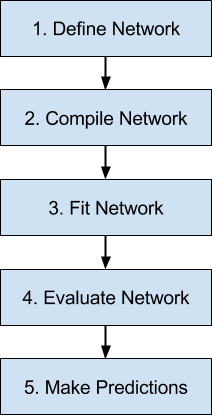

In [11]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()# Using Functional Class we can build more custom NN architectures!

model.add(Dense(11,input_dim=11,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 36        
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


In [12]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=100)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
3918/3918 [==============================] - 0s 95us/step - loss: 3.8117 - accuracy: 0.3877
Epoch 2/100
3918/3918 [==============================] - 0s 32us/step - loss: 1.0319 - accuracy: 0.4543
Epoch 3/100
3918/3918 [==============================] - 0s 31us/step - loss: 0.9924 - accuracy: 0.4798
Epoch 4/100
3918/3918 [==============================] - 0s 30us/step - loss: 1.0036 - accuracy: 0.4803
Epoch 5/100
3918/3918 [==============================] - 0s 42us/step - loss: 0.9899 - accuracy: 0.4855
Epoch 6/100
3918/3918 [==============================] - 0s 53us/step - loss: 0.9865 - accuracy: 0.4855
Epoch 7/100
3918/3918 [==============================] - 0s 47us/step - loss: 0.9812 - accuracy: 0.4939
Epoch 8/100
3918/3918 [==============================] - 0s 43us/step - loss: 0.9765 - accuracy: 0.5023
Epoch 9/100
3918/3918 [==============================] - 0s 33us/step - loss: 0.9742 - accuracy: 0.4957
Epoch 10/100
3918/3918 [==============================] - 0s 34u

3918/3918 [==============================] - 0s 43us/step - loss: 1.0601 - accuracy: 0.4449
Epoch 80/100
3918/3918 [==============================] - 0s 48us/step - loss: 1.0622 - accuracy: 0.4449
Epoch 81/100
3918/3918 [==============================] - 0s 44us/step - loss: 1.0625 - accuracy: 0.4449
Epoch 82/100
3918/3918 [==============================] - 0s 49us/step - loss: 1.0616 - accuracy: 0.4449
Epoch 83/100
3918/3918 [==============================] - 0s 38us/step - loss: 1.0621 - accuracy: 0.4449
Epoch 84/100
3918/3918 [==============================] - 0s 51us/step - loss: 1.0605 - accuracy: 0.4449
Epoch 85/100
3918/3918 [==============================] - 0s 35us/step - loss: 1.0620 - accuracy: 0.4449
Epoch 86/100
3918/3918 [==============================] - 0s 41us/step - loss: 1.0606 - accuracy: 0.4449
Epoch 87/100
3918/3918 [==============================] - 0s 52us/step - loss: 1.0632 - accuracy: 0.4449
Epoch 88/100
3918/3918 [==============================] - 0s 37us/st

In [13]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
#print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       455
           1       0.00      0.00      0.00       320
           2       0.00      0.00      0.00       205

    accuracy                           0.46       980
   macro avg       0.15      0.33      0.21       980
weighted avg       0.22      0.46      0.29       980



/home/siddharth/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
